In [1]:
from __future__ import print_function
import numpy as np
import scipy as sp
import pylab as pl
from scipy import stats
import seaborn
import matplotlib.mlab as mlab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
np.random.seed(42)
mymean = 714.
mystdev = 31.
Nsamples = 100
iters = 1000
distMeans = np.zeros(iters)
for i in range(iters):
    mydistb = (sp.stats.norm.rvs(loc=mymean, scale=mystdev, size=Nsamples))
    distMeans[i] = mydistb.mean()

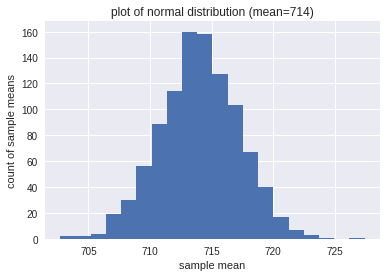

In [3]:
pl.hist(distMeans, bins=20)
pl.xlabel('sample mean')
pl.ylabel('count of sample means')
pl.title('plot of normal distribution (mean=714)')
pl.show()

**Description**<br>
A plot of a normal distribution, appearing very guassian.

In [4]:
z_test = ((mymean - distMeans)) * np.sqrt(Nsamples) / mystdev

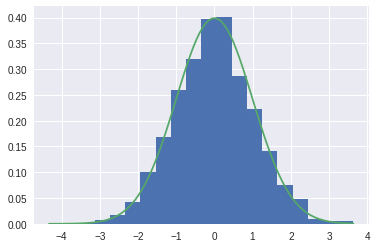

In [5]:
result = pl.hist(z_test, bins=20, normed=True)

# Plot Standard Normal Distribution
X = np.linspace(min(z_test), max(z_test), 100)
gauss = pl.plot(X, mlab.normpdf(X, 0, 1))
pl.show()

**Description**<br>
Another plot of a normal distribution, appearing very guassian. In fact, this one has a guassian sitting atop it! And, what's more, it's a STANDARD NORMAL! Aren't Z-scores the best? Is it magic?! It's math!<br>
In fact, as our KS-test (below) indicates, it's well over the threshold for us to accept the null hypothesis that states that we do, in fact, have a normal gaussian on our hands. Who'd have thunk it?!? 

In [7]:
sp.stats.kstest(z_test, 'norm')

KstestResult(statistic=0.017159497514997679, pvalue=0.9300242404830682)

## Logistic Function

Sample Mean: 710.931


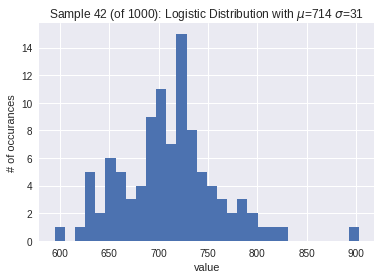

In [8]:
np.random.seed(42)
mymean = 714.
mystdev = 31.
Nsamples = 100
iters = 1000
distMeans = np.zeros(iters)
for i in range(iters):
    mydistb = (sp.stats.logistic.rvs(loc=mymean, scale=mystdev, size=Nsamples))
    distMeans[i] = mydistb.mean()
    if i == 42:
        pl.hist(mydistb, bins=30)
        pl.ylabel('# of occurances')
        pl.xlabel('value')
        pl.title('Sample 42 (of 1000): Logistic Distribution with $\mu$=714 $\sigma$=31')
        print('Sample Mean:', round(mydistb.mean(),3))

**Description:**<br>
Above, we have a plot of one of the samples feeding into our sample means plot. We will see that it appears more sporadic than the combined sample means (as N=100 in this instance, while N=1000 in the sample means).

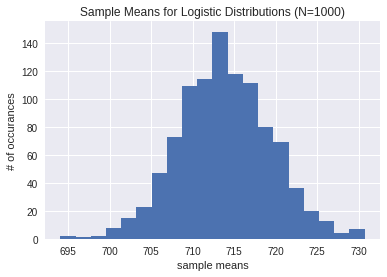

In [9]:
pl.hist(distMeans, bins=20)
pl.ylabel('# of occurances')
pl.xlabel('sample means')
pl.title('Sample Means for Logistic Distributions (N=1000)')
pl.show()

**Description**<br>
The above graph incorporates the sample mean of 1000 logistic distributions (each with 100 samples, a mean of 714, and a standard deviation of 31)

In [10]:
z_test = ((mymean - distMeans)) * np.sqrt(Nsamples) / mystdev

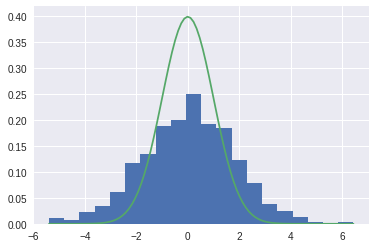

In [11]:
result = pl.hist(z_test, bins=20, normed=True)

# Plot Standard Normal Distribution
X = np.linspace(min(z_test), max(z_test), 100)
gauss = pl.plot(X, mlab.normpdf(X, 0, 1))
pl.show()

In [13]:
sp.stats.kstest(z_test, 'norm')

KstestResult(statistic=0.14969250752393759, pvalue=0.0)

**Description:**<br>
We've got a standard normal transposed over our logistic function that we've standardized. It's got that nice guassian shape to it, and without a frame of reference, one might think it was standard normal, but our image and KS-test both confirm (the image because it is much shorter adn fatter than the St. Norm, and the KS-test because the pvalue is well below the statistic) that we must reject the null hypothesis and say that it is not, in fact, a standard normal guassian in this instance. 